In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('~/Downloads/MxMH.csv')
df.describe(include='all')
df.columns
df['Primary streaming service'] = df['Primary streaming service'].replace({
    'I do not use a streaming service.': 'None',
    'Other streaming service': 'Other'
})
df['Age Group'] = pd.cut(df['Age'],
                         bins=[0, 19, 29, 39, 49, 59, 100],
                         labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60+'])
df['Hours per day Group'] = pd.cut(df['Hours per day'],
                         bins=[0, 4, 9, 14, 19, 24],
                         labels=['0-4', '5-9', '10-14', '15-19', '20-24'])
df['Overall MH'] = df['Anxiety'] + df['Depression'] + df['OCD'] + df['Insomnia']
df

Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0                     Other            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
0             Yes             Yes      Yes             Latin         Yes   
1             Yes              No       No              Rock         Yes   
2              No              No       No  Video game music          No   
3             Yes              No      Yes              Jazz         Yes   
4             Yes              No       No               R&B         Yes   
..            ...             ...      ...               ...         ...   
731           Yes             Yes       No              Rock         Yes   
732           Yes             Yes       No               Pop         Yes   
733           Yes              No      Yes               Rap         Yes   
734           Yes             Yes       No         Classical          No   
735           Yes              No       No           Hip hop         Yes   

    Foreign languages  ...  Frequency [Video game music] Anxiety Depression  \
0                 Yes  ...                     Sometimes     3.0        0.0   
1                  No  ...                        Rarely     7.0        2.0   
2                 Yes  ...               Very frequently     7.0        7.0   
3                 Yes  ...                         Never     9.0        7.0   
4                  No  ...                        Rarely     7.0        2.0   
..                ...  ...                           ...     ...        ...   
731               Yes  ...                         Never     7.0        6.0   
732               Yes  ...                     Sometimes     3.0        2.0   
733                No  ...                        Rarely     2.0        2.0   
734                No  ...                     Sometimes     2.0        3.0   
735               Yes  ...                        Rarely     2.0        2.0   

    Insomnia  OCD Music effects    Permissions Age Group Hours per day Group  \
0        1.0  0.0           NaN  I understand.     10-19                 0-4   
1        2.0  1.0           NaN  I understand.       60+                 0-4   
2       10.0  2.0     No effect  I understand.     10-19                 0-4   
3        3.0  3.0       Improve  I understand.       60+                 0-4   
4        5.0  9.0       Improve  I understand.     10-19                 0-4   
..       ...  ...           ...            ...       ...                 ...   
731      0.0  9.0       Improve  I understand.     10-19                 0-4   
732      2.0  5.0       Improve  I understand.     10-19                 0-4   
733      2.0  2.0       Improve  I understand.     10-19                 5-9   
734      2.0  1.0       Improve  I understand.     10-19                 5-9   
735      2.0  5.0       Improve  I understand.     20-29                 0-4   

    Overall MH  
0          4.0  
1         12.0  
2         26.0  
3         22.0  
4         23.0  
..         ...  
731       22.0  
732       12.0  
733        8.0  
734        8.0  
735       11.0  

[736 rows x 36 columns]

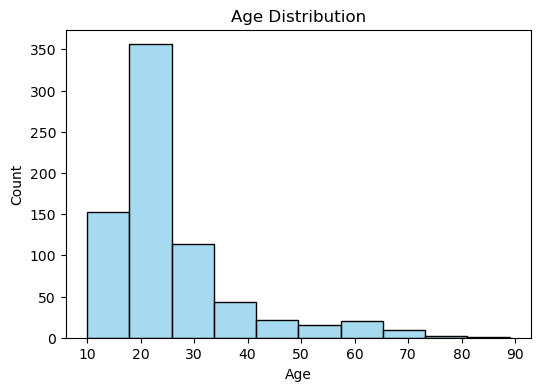

In [3]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], color='skyblue', bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

/var/folders/0l/s1l2ffnj4xzfb54jmp1tvk080000gn/T/ipykernel_48401/2764036170.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_age = df.groupby('Age Group')['Hours per day'].mean()


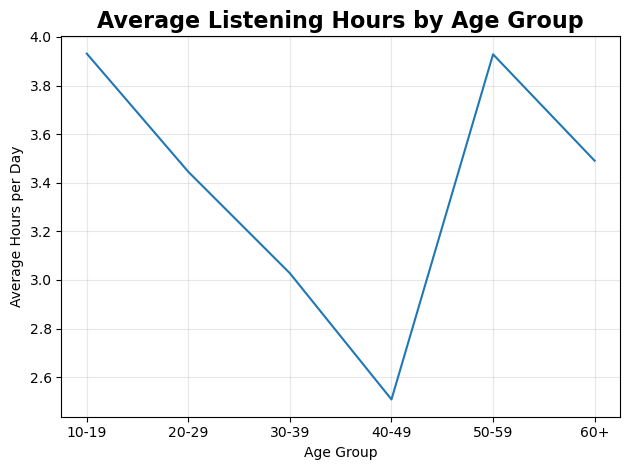

In [5]:
hours_age = df.groupby('Age Group')['Hours per day'].mean()

plt.plot(hours_age.index, hours_age.values)
plt.title('Average Listening Hours by Age Group', fontsize=16, weight='bold')
plt.xlabel('Age Group')
plt.ylabel('Average Hours per Day')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

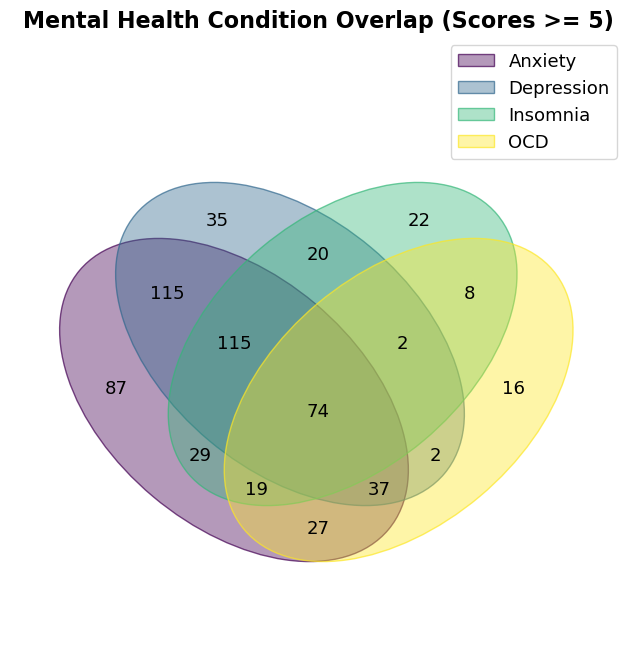

This venn diagram shows strong overlap among anxiety, depression, as well as insomnia


In [7]:
from venn import venn
import matplotlib.pyplot as plt

anxiety_high = set(df[df['Anxiety'] >= 5].index)
depression_high = set(df[df['Depression'] >= 5].index)
insomnia_high = set(df[df['Insomnia'] >= 5].index)
ocd_high = set(df[df['OCD'] >= 5].index)

sets = {
    'Anxiety': anxiety_high,
    'Depression': depression_high,
    'Insomnia': insomnia_high,
    'OCD': ocd_high
}

venn(sets)
plt.title('Mental Health Condition Overlap (Scores >= 5)', fontsize=16, weight='bold')
plt.show()

print('This venn diagram shows strong overlap among anxiety, depression, as well as insomnia')

             Anxiety       OCD  Depression  Insomnia
Anxiety     1.000000  0.348350    0.519969  0.292669
OCD         0.348350  1.000000    0.196988  0.226354
Depression  0.519969  0.196988    1.000000  0.378996
Insomnia    0.292669  0.226354    0.378996  1.000000


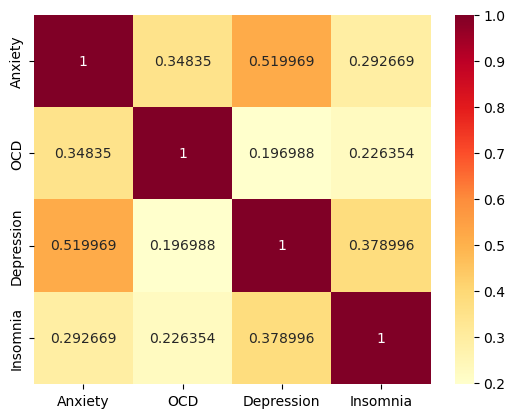

In [9]:
cols = ['Anxiety', 'OCD', 'Depression', 'Insomnia']
corr = df[cols].corr()
print(corr)
sns.heatmap(corr, annot=True, fmt='g', cmap='YlOrRd')
plt.show()

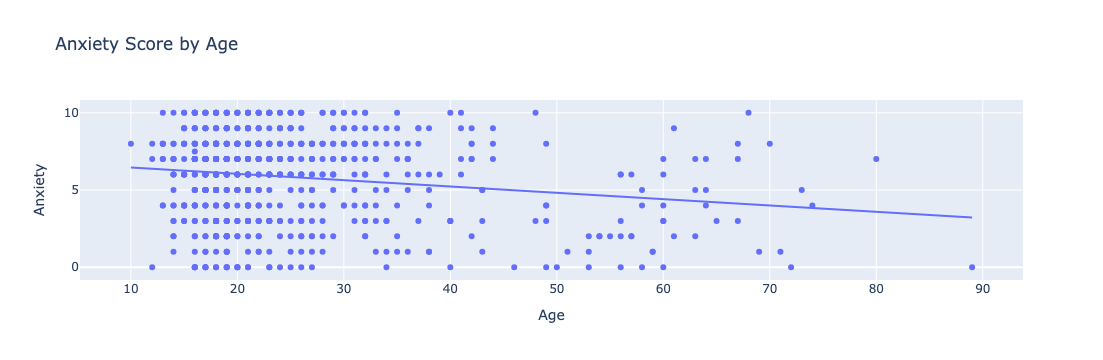

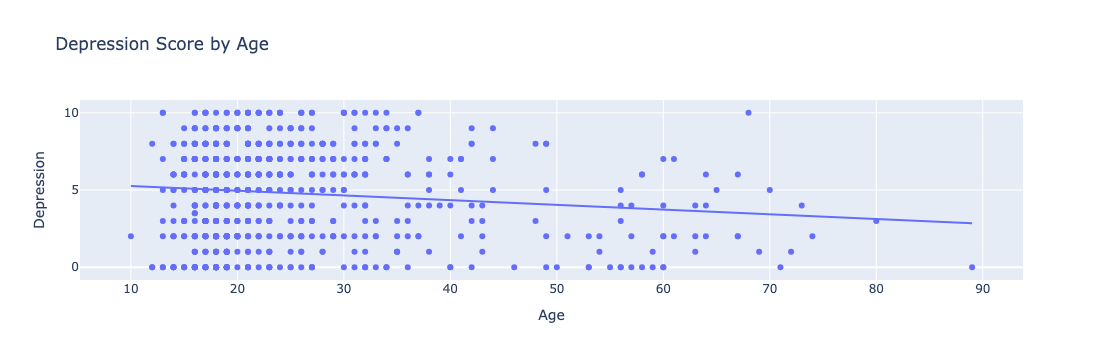

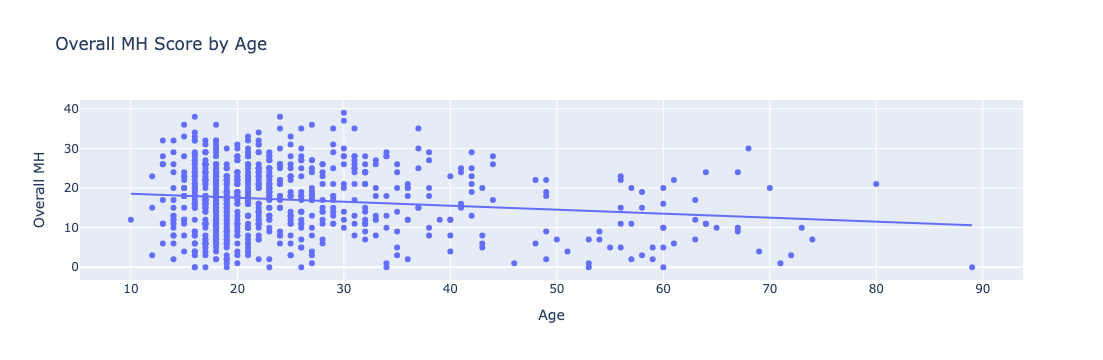

In [13]:
import plotly.express as px
fig = px.scatter(df, x='Age', y='Anxiety', 
                  title='Anxiety Score by Age', 
                  trendline='ols')
fig.show()

fig = px.scatter(df, x='Age', y='Depression', 
                  title='Depression Score by Age', 
                  trendline='ols')
fig.show()

fig = px.scatter(df, x='Age', y='Overall MH', 
                  title='Overall MH Score by Age', 
                  trendline='ols')
fig.show()

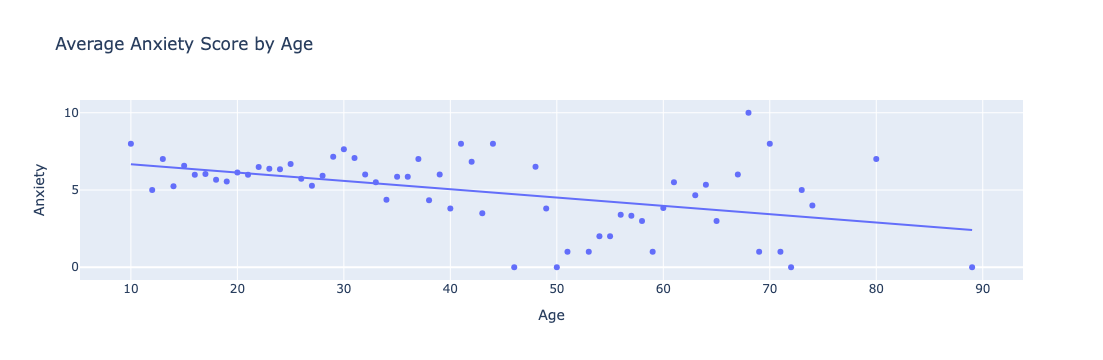

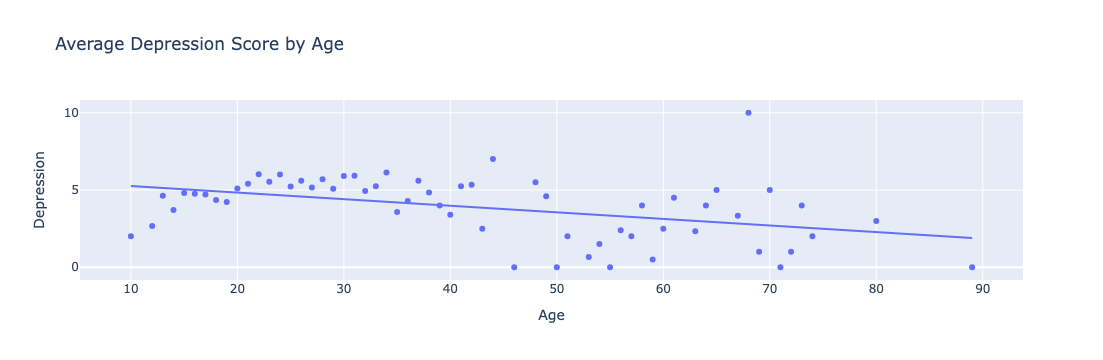

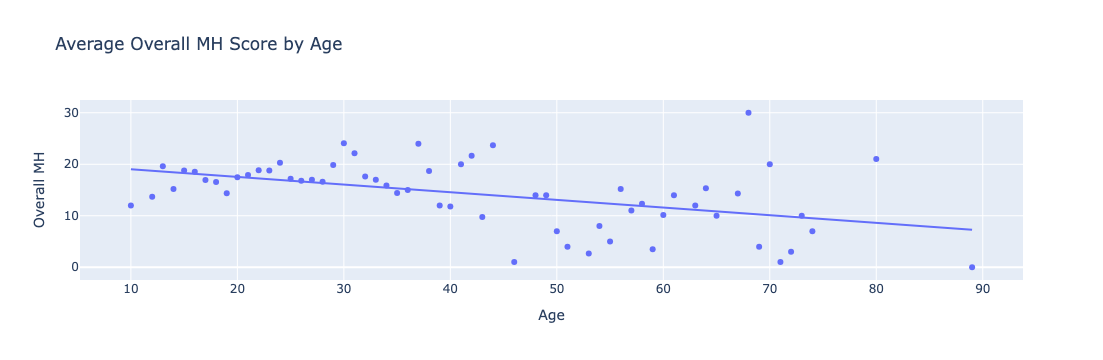

In [15]:
age_stats = df.groupby('Age')[['Anxiety', 'Depression', 'Overall MH']].mean().reset_index()

fig = px.scatter(age_stats, x='Age', y='Anxiety', 
                  title='Average Anxiety Score by Age', 
                  trendline='ols')
fig.show()

fig = px.scatter(age_stats, x='Age', y='Depression', 
                  title='Average Depression Score by Age', 
                  trendline='ols')
fig.show()

fig = px.scatter(age_stats, x='Age', y='Overall MH', 
                  title='Average Overall MH Score by Age', 
                  trendline='ols')
fig.show()
# comment on the other trend line for the curves and peaks

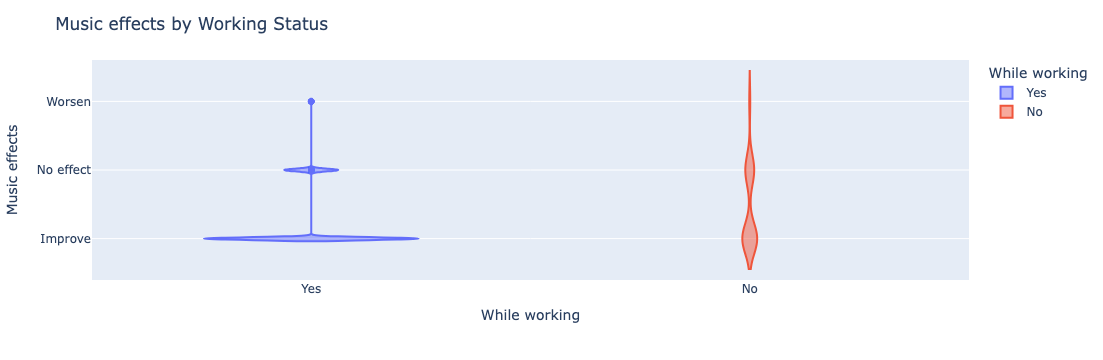

In [17]:
fig = px.violin(df, x='While working', y='Music effects', color='While working')
fig.update_layout(title='Music effects by Working Status')
fig.show()

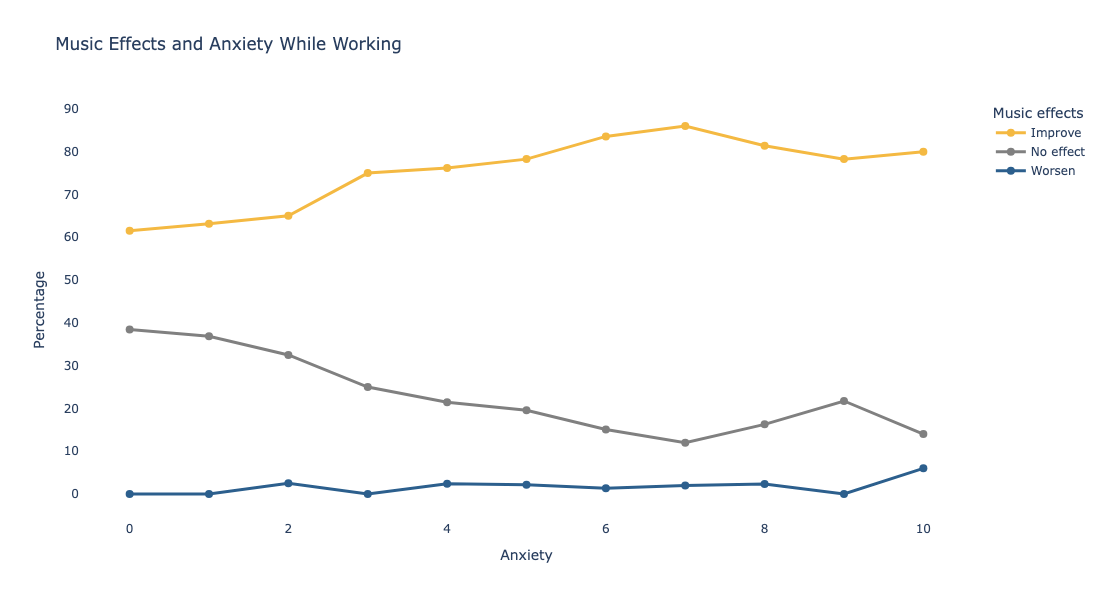

In [23]:
df_filtered = df[(df['Anxiety'] % 1 == 0) & (df['While working'] == 'Yes')]
crosstab = pd.crosstab(df_filtered['Anxiety'], df_filtered['Music effects'], normalize='index') * 100
data = crosstab.reset_index().melt(id_vars='Anxiety', var_name='Music effects', value_name='Percentage')

fig = px.line(data, x='Anxiety', y='Percentage', color='Music effects',
              color_discrete_map={'Improve': '#F4B942', 'No effect': 'gray', 'Worsen': '#2C5F8D'},
              markers=True,
              title='Music Effects and Anxiety While Working')

fig.update_traces(line=dict(width=3), marker=dict(size=8))
fig.update_layout(width=800, height=600, plot_bgcolor='white')
fig.show()

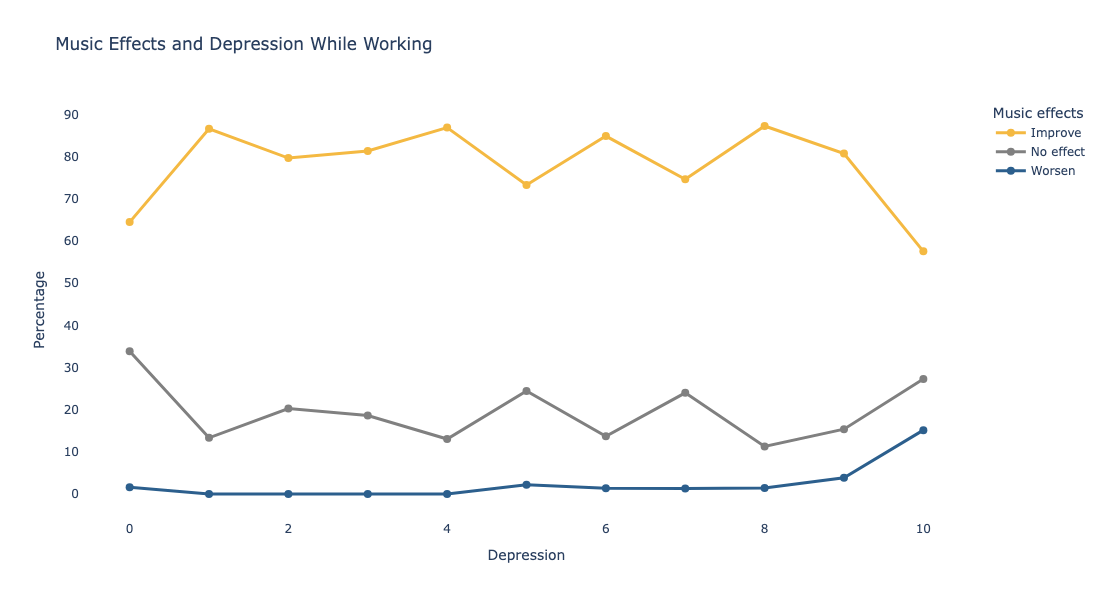

In [27]:
df_filtered = df[(df['Depression'] % 1 == 0) & (df['While working'] == 'Yes')]
crosstab = pd.crosstab(df_filtered['Depression'], df_filtered['Music effects'], normalize='index') * 100
data = crosstab.reset_index().melt(id_vars='Depression', var_name='Music effects', value_name='Percentage')

fig = px.line(data, x='Depression', y='Percentage', color='Music effects',
              color_discrete_map={'Improve': '#F4B942', 'No effect': 'gray', 'Worsen': '#2C5F8D'},
              markers=True,
              title='Music Effects and Depression While Working')

fig.update_traces(line=dict(width=3), marker=dict(size=8))
fig.update_layout(width=800, height=600, plot_bgcolor='white')
fig.show()

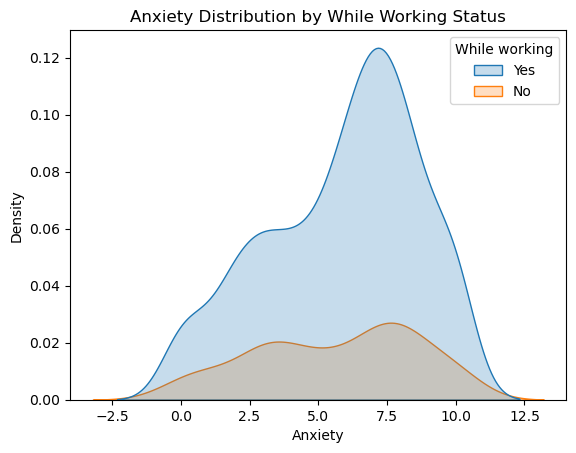

In [29]:
sns.kdeplot(data=df, x='Anxiety', hue='While working', fill=True)
plt.title('Anxiety Distribution by While Working Status')
plt.show()

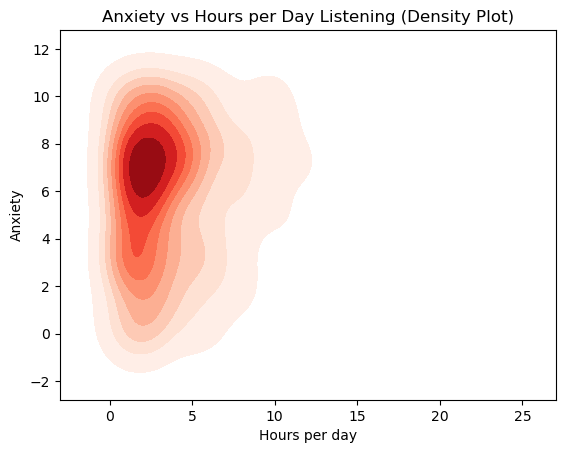

In [31]:
sns.kdeplot(data=df, x='Hours per day', y='Anxiety', fill=True, cmap='Reds')
plt.title('Anxiety vs Hours per Day Listening (Density Plot)')
plt.show()

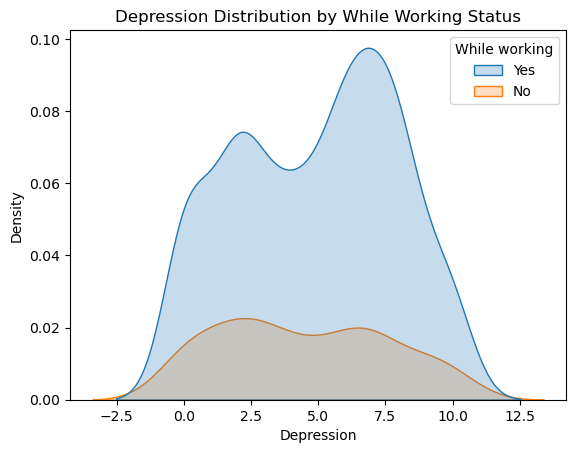

In [35]:
sns.kdeplot(data=df, x='Depression', hue='While working', fill=True)
plt.title('Depression Distribution by While Working Status')
plt.show()

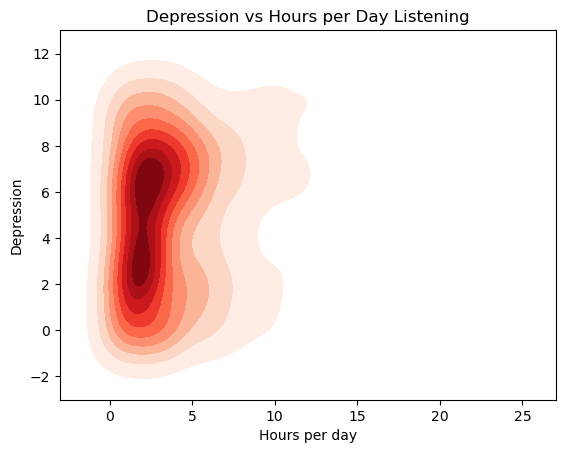

In [33]:
sns.kdeplot(data=df, x='Hours per day', y='Depression', fill=True, cmap='Reds')
plt.title('Depression vs Hours per Day Listening')
plt.show()

/var/folders/0l/s1l2ffnj4xzfb54jmp1tvk080000gn/T/ipykernel_48401/1322447711.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



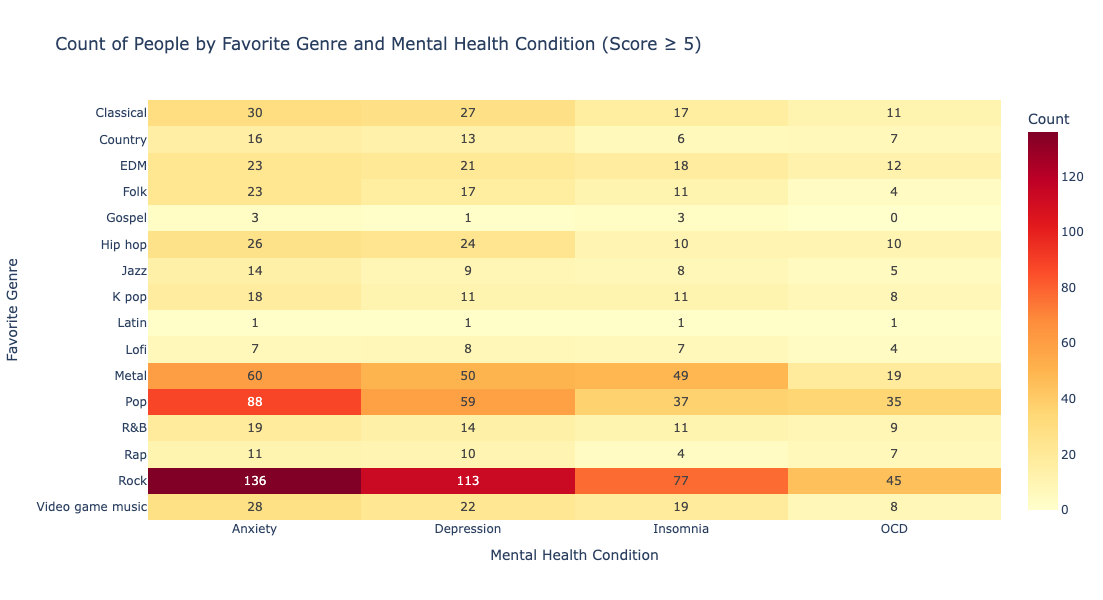

In [37]:
import plotly.express as px

genre_mental_health = df[df[['Anxiety', 'Depression', 'Insomnia', 'OCD']].ge(5).any(axis=1)]
heatmap_data = genre_mental_health.groupby('Fav genre').apply(
    lambda x: pd.Series({
        'Anxiety': (x['Anxiety'] >= 5).sum(),
        'Depression': (x['Depression'] >= 5).sum(),
        'Insomnia': (x['Insomnia'] >= 5).sum(),
        'OCD': (x['OCD'] >= 5).sum()
    })
).reset_index()

fig = px.imshow(heatmap_data.set_index('Fav genre'),
        labels=dict(x="Mental Health Condition", y="Favorite Genre", color="Count"),
        title='Count of People by Favorite Genre and Mental Health Condition (Score ≥ 5)',
        text_auto=True,
        color_continuous_scale='YlOrRd',
        aspect='auto')

fig.update_layout(height=600, width=900)
fig.show()

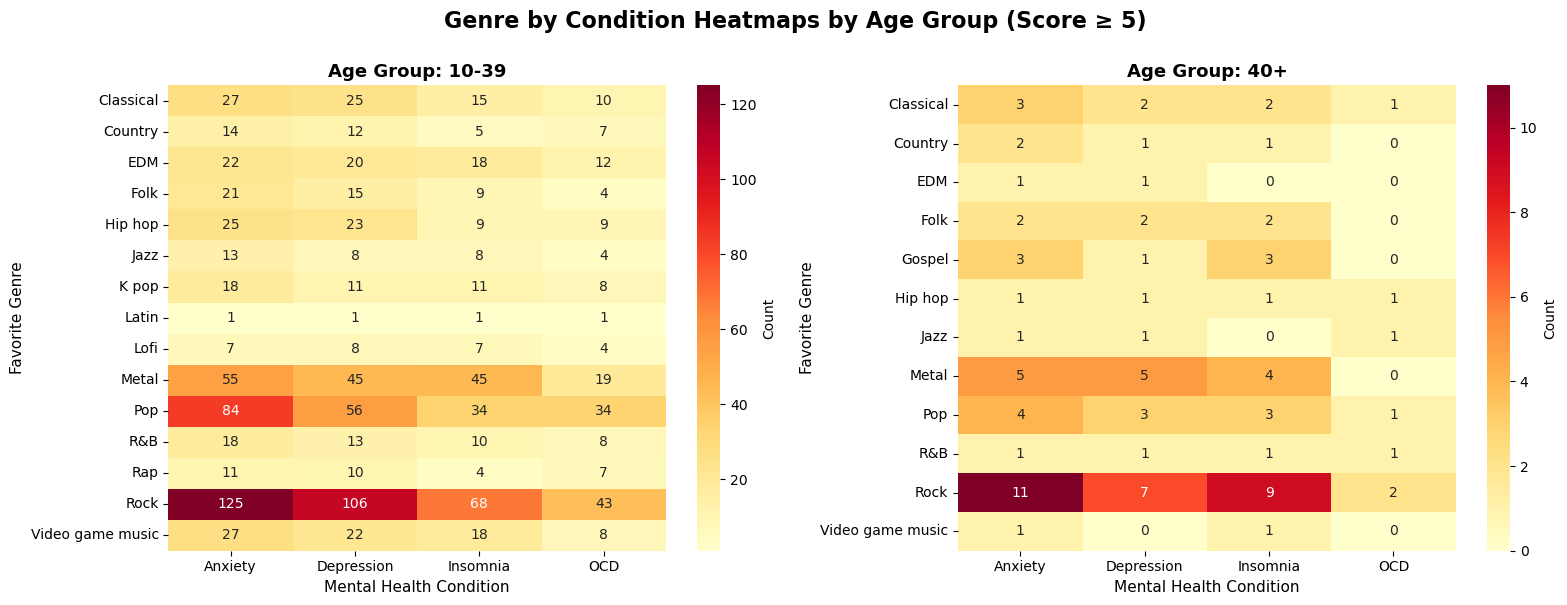

In [39]:
df['Age Group Broad'] = df['Age'].apply(lambda x: '10-39' if 10 <= x <= 39 else '40+')

conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
age_groups = ['10-39', '40+']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, age in enumerate(age_groups):
    age_data = df[df['Age Group Broad'] == age]
    
    genre_data = {}
    for condition in conditions:
        filtered = age_data[age_data[condition] >= 5]
        genre_counts = filtered['Fav genre'].value_counts()
        genre_data[condition] = genre_counts
    
    df_plot = pd.DataFrame(genre_data).fillna(0)
    
    ax = axes[i]
    if not df_plot.empty:
        sns.heatmap(df_plot, annot=True, fmt='g', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Count'})
        ax.set_title(f'Age Group: {age}', fontsize=13, weight='bold')
        ax.set_ylabel('Favorite Genre', fontsize=11) 
        ax.set_xlabel('Mental Health Condition', fontsize=11)
    else:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center')
        ax.set_title(f'Age Group: {age}', fontsize=13, weight='bold')

fig.suptitle('Genre by Condition Heatmaps by Age Group (Score ≥ 5)', fontsize=16, weight='bold', y=1.00)
plt.tight_layout()
plt.show()

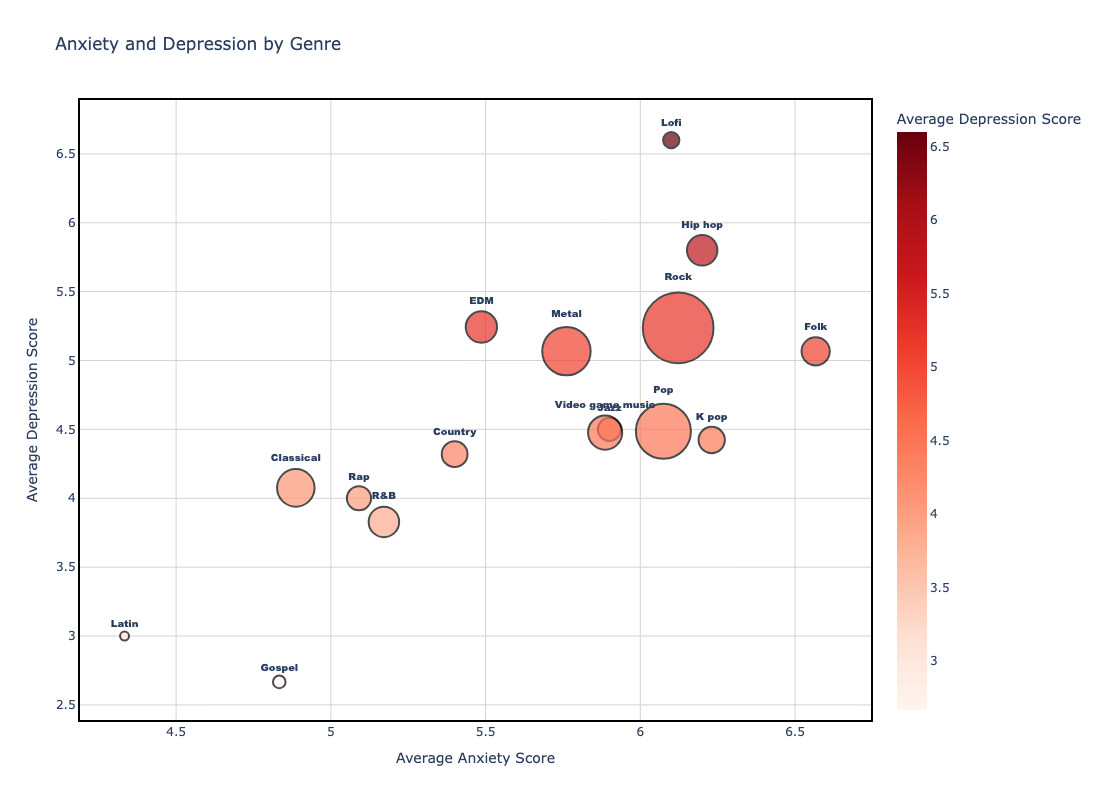

This graph, while showing the anxiety and depression scores of each genre, also displays the positive correlation between anxiety and depression


In [41]:
genre_stats = df.groupby('Fav genre').agg({
    'Anxiety': 'mean',
    'Depression': 'mean',
    'Fav genre': 'count'
}).rename(columns={'Fav genre': 'count'}).reset_index()

fig = px.scatter(genre_stats, x='Anxiety', y='Depression', 
                 size='count', color='Depression',
                 text='Fav genre', 
                 title='Anxiety and Depression by Genre',
                 labels={'Anxiety': 'Average Anxiety Score', 
                         'Depression': 'Average Depression Score'},
                 color_continuous_scale='Reds',
                 size_max=50)

fig.update_traces(
    textposition='top center', 
    marker=dict(line=dict(width=2, color='black')),
    textfont=dict(size=10, family='Arial Black'),
    texttemplate='<b>%{text}</b>'
)
fig.update_layout(
    width=800, height=800, 
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray', 
               showline=True, linewidth=2, linecolor='black', mirror=True),
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray',
               showline=True, linewidth=2, linecolor='black', mirror=True)
)
fig.show()

print('This graph, while showing the anxiety and depression scores of each genre, also displays the positive correlation between anxiety and depression')

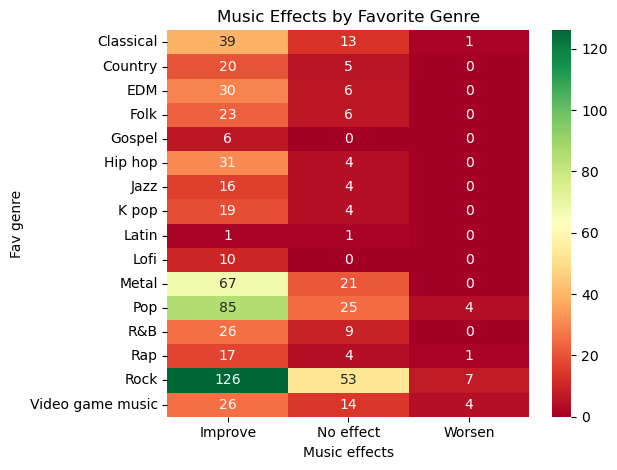

In [43]:
genre_effects = pd.crosstab(df['Fav genre'], df['Music effects'])
sns.heatmap(genre_effects, annot=True, fmt='d', cmap='RdYlGn')
plt.title('Music Effects by Favorite Genre')
plt.tight_layout()
plt.show()